In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sales=pd.read_csv('C:/Users/hemat/Downloads/Amazon Sales data.csv')
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
sales.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
sales.shape

(100, 14)

In [8]:
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [9]:
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

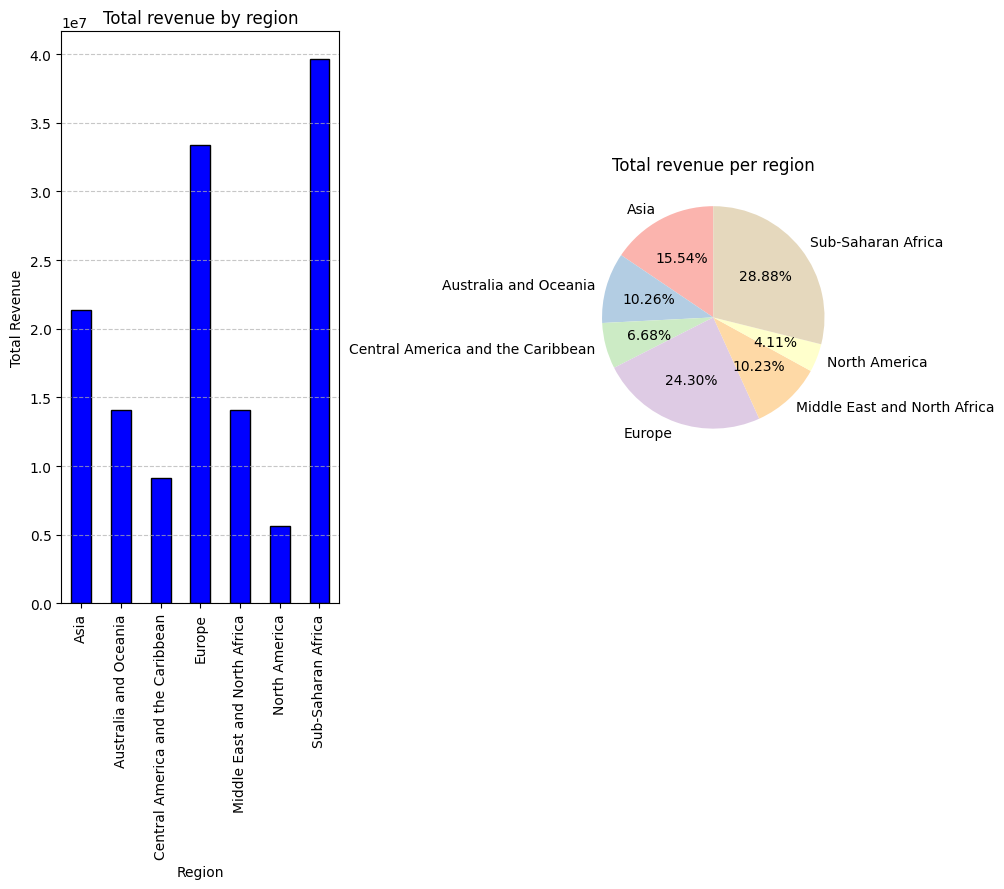

In [10]:
#distribution of sales across different regions
region_revenue=sales.groupby('Region')['Total Revenue'].sum()
fig,ax=plt.subplots(1,2,figsize=(10,9))

region_revenue.plot(kind='bar',color='blue',edgecolor='black',ax=ax[0])
ax[0].set_title('Total revenue by region')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Total Revenue')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

region_revenue.plot(kind='pie',autopct='%.2f%%',colors=plt.cm.Pastel1.colors,startangle=90,ax=ax[1])
ax[1].set_title('Total revenue per region')
ax[1].set_ylabel(' ')

plt.tight_layout()
plt.show()


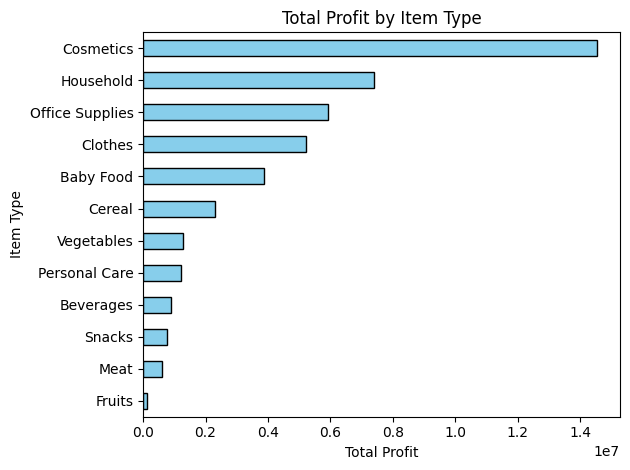

In [11]:
#total profit from item types
item_profit = sales.groupby('Item Type')['Total Profit'].sum()
item_profit_sorted = item_profit.sort_values(ascending=True)
item_profit_sorted.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.title('Total Profit by Item Type')

plt.tight_layout()
plt.show()

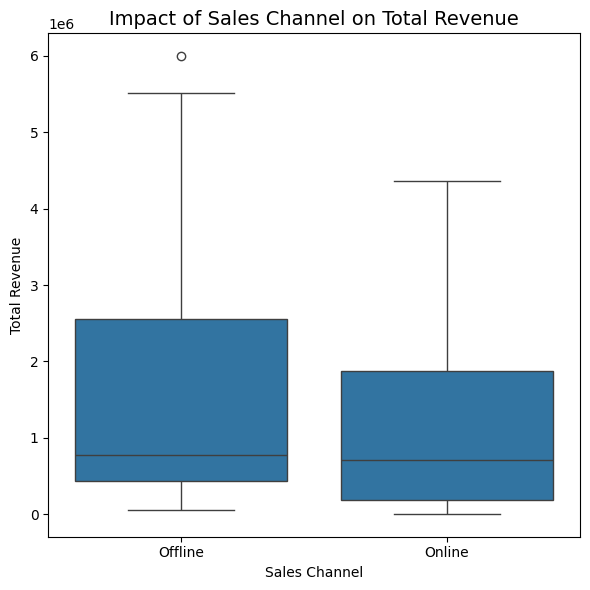

In [12]:
#How does the sales channel (Online/Offline) impact total revenue?
plt.figure(figsize=(6, 6))
sns.boxplot(data=sales, x='Sales Channel', y='Total Revenue', legend=False)

plt.title('Impact of Sales Channel on Total Revenue', fontsize=14)
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')


plt.tight_layout()
plt.show()

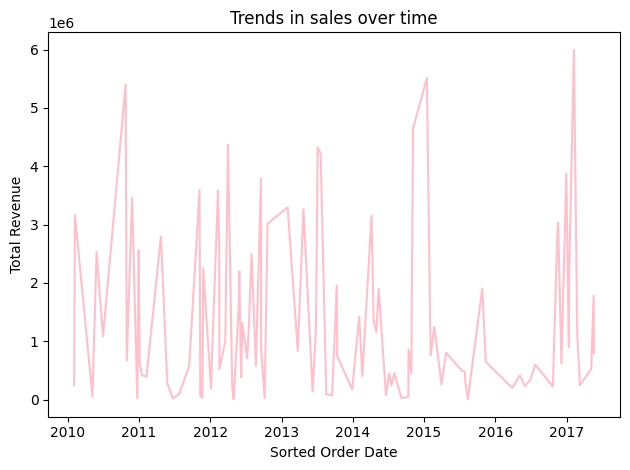

In [13]:
#trends in sales over time
sales['Sorted Order Date']=pd.to_datetime(sales['Order Date'])
sns.lineplot(data=sales,x='Sorted Order Date',y='Total Revenue',color='pink')
plt.xlabel('Sorted Order Date')
plt.ylabel('Total Revenue')
plt.title('Trends in sales over time')
plt.tight_layout()
plt.show()


Index(['Albania', 'Angola', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belize', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cameroon',
       'Cape Verde', 'Comoros', 'Costa Rica', 'Cote d'Ivoire',
       'Democratic Republic of the Congo', 'Djibouti', 'East Timor',
       'Federated States of Micronesia', 'Fiji', 'France', 'Gabon', 'Grenada',
       'Haiti', 'Honduras', 'Iceland', 'Iran', 'Kenya', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania',
       'Macedonia', 'Madagascar', 'Malaysia', 'Mali', 'Mauritania', 'Mexico',
       'Moldova ', 'Monaco', 'Mongolia', 'Mozambique', 'Myanmar',
       'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Portugal',
       'Republic of the Congo', 'Romania', 'Russia', 'Rwanda', 'Samoa ',
       'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Sierra Leone', 'Slovakia', 'Slovenia', 'Solomon Islands',
       'South Sudan', 'Spain', 'Sri Lanka', 'Switzerland'

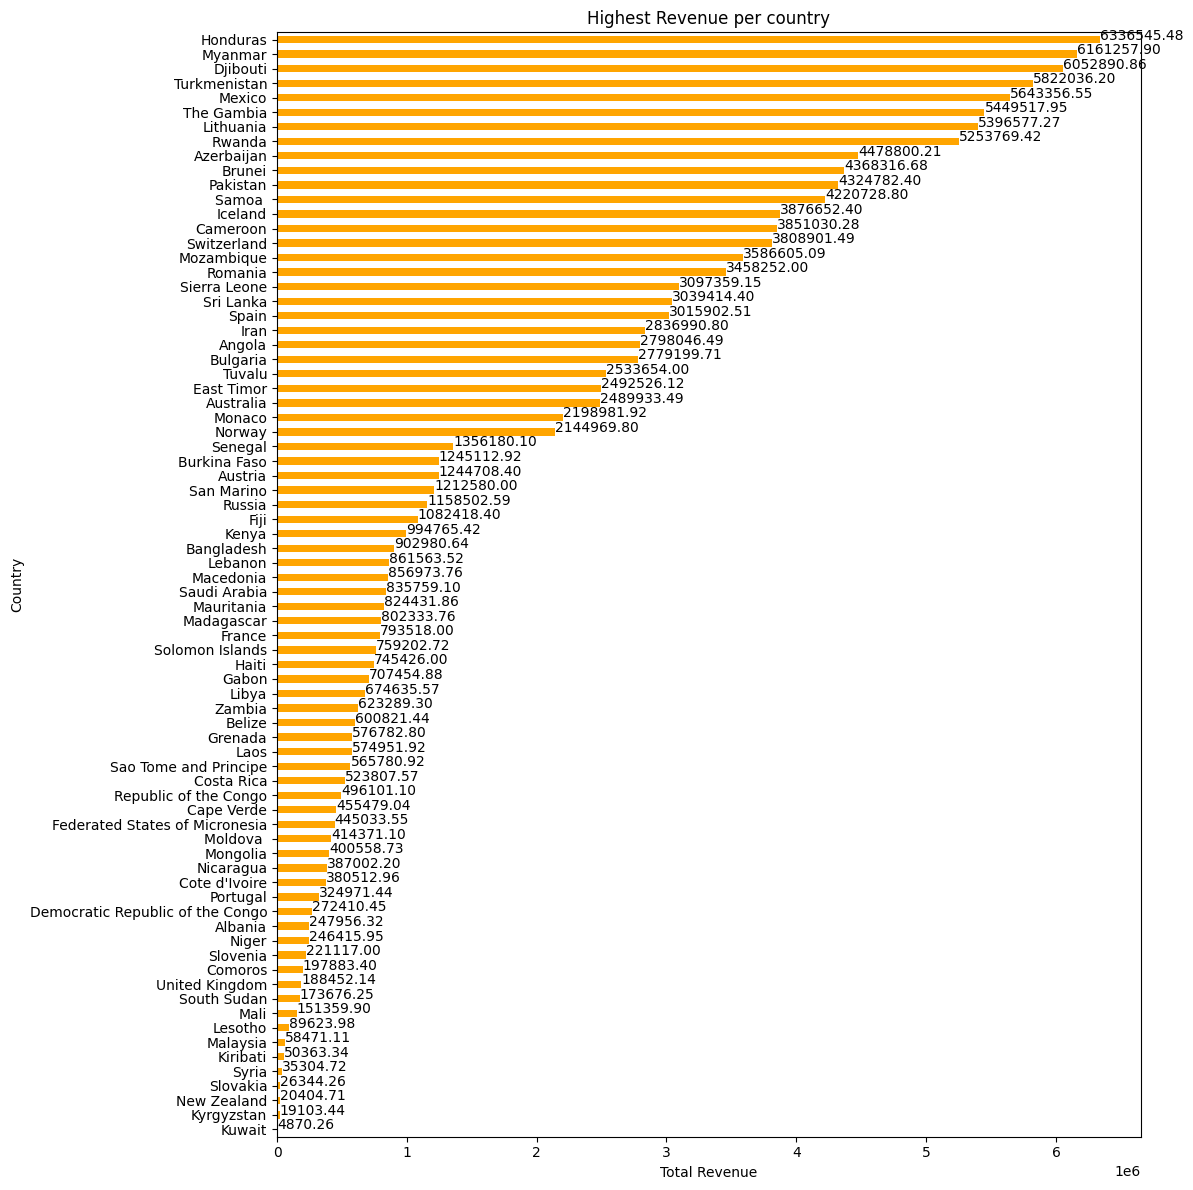

In [14]:
#Which country generates the highest revenue, and how do other countries compare?
plt.figure(figsize=(12,12))
revenue_country=sales.groupby('Country')['Total Revenue'].sum()
print(revenue_country.index)
print(revenue_country.values)
revenue_country_sorted=revenue_country.sort_values()
revenue_country_sorted.plot(kind='barh',color='orange')
plt.title('Highest Revenue per country')
plt.ylabel('Country')
plt.xlabel('Total Revenue')
for i, value in enumerate(revenue_country_sorted):
    plt.text(value, i, f'{value:.2f}') 
plt.tight_layout()
plt.show()

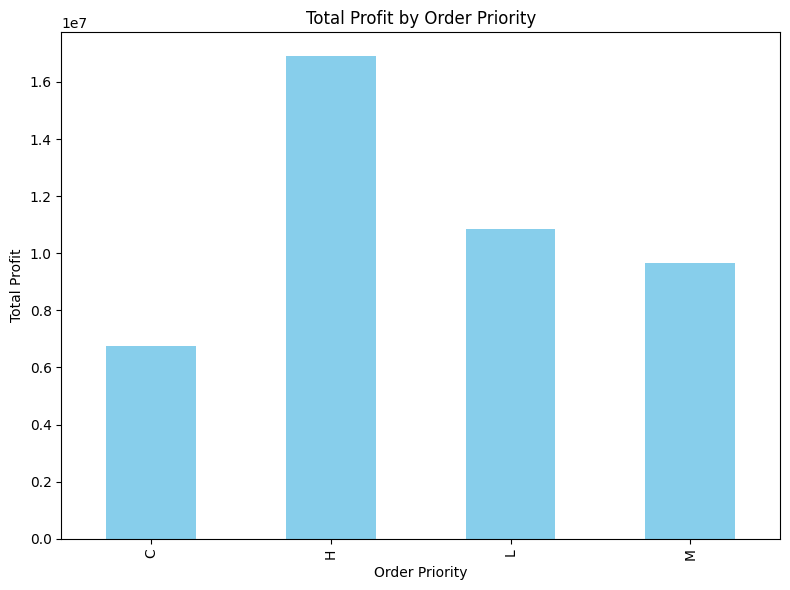

In [15]:
#How do different order priorities impact profits?
priority_profit = sales.groupby('Order Priority')['Total Profit'].sum()
priority_profit.plot(kind='bar', color='skyblue', figsize=(8, 6))

plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

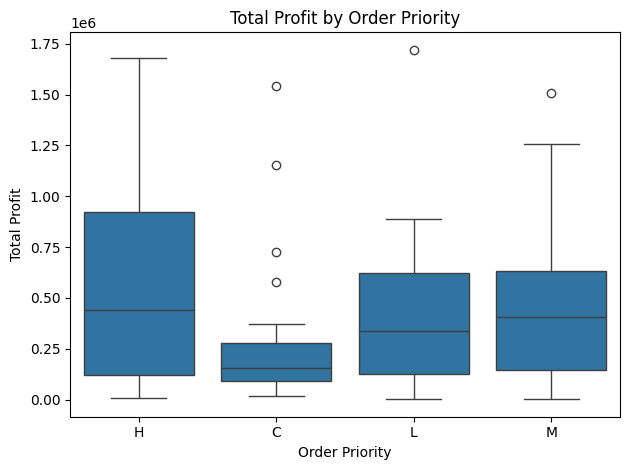

In [16]:
#How do different order priorities impact profits?
sns.boxplot(x='Order Priority', y='Total Profit',data=sales)
plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()


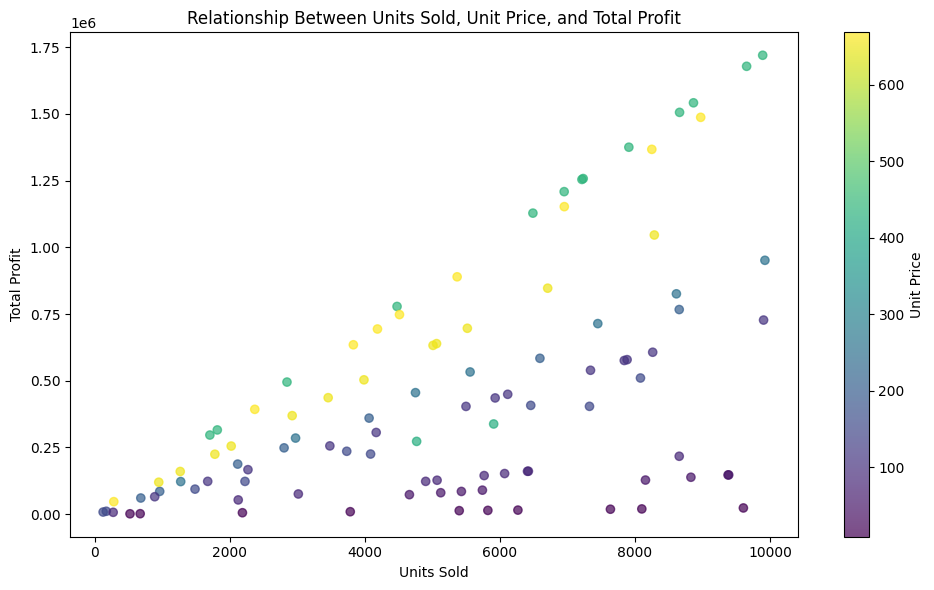

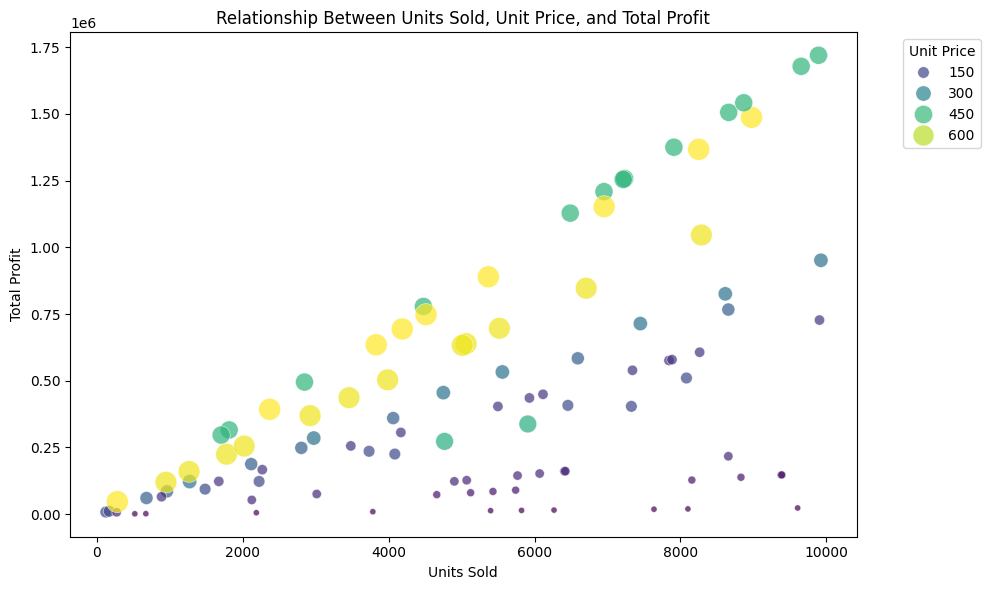

In [17]:
#relationships between Units Sold, Unit Price, and Total Profit
#1.USING MATPLOTLIB
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sales['Units Sold'],
    sales['Total Profit'],
    c=sales['Unit Price'],  # Color by Unit Price
    cmap='viridis',         # Color map
    alpha=0.7               # Transparency for better visibility
)

# Add color bar for Unit Price
cbar = plt.colorbar(scatter)
cbar.set_label('Unit Price')

plt.title('Relationship Between Units Sold, Unit Price, and Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

#USING SEABORN
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Units Sold',
    y='Total Profit',
    hue='Unit Price',          # Color by Unit Price
    size='Unit Price',         # Optional: Size by Unit Price
    sizes=(20, 250),           # Size range for points
    data=sales,
    palette='viridis',
    alpha=0.7
)
plt.title('Relationship Between Units Sold, Unit Price, and Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.legend(title='Unit Price', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

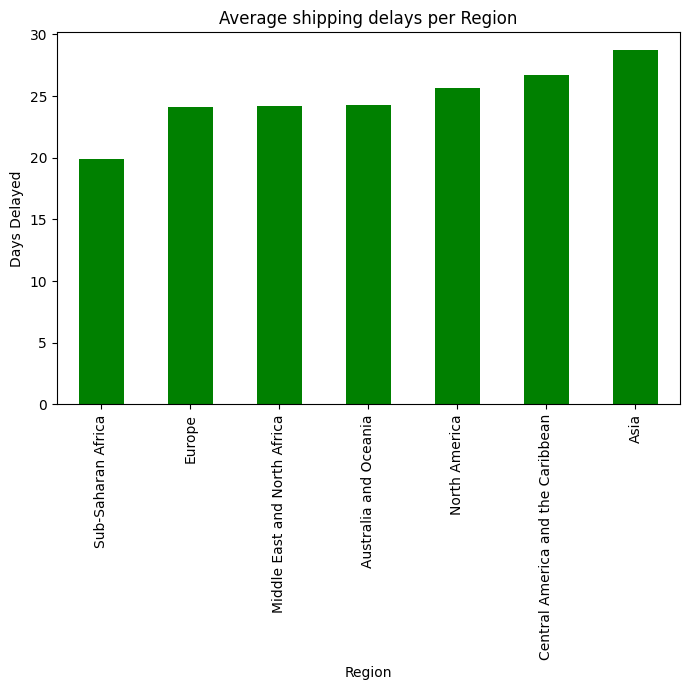

In [18]:
#shipping delays across regions
plt.figure(figsize=(7,7))
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])
sales['Shipping Delay']=(sales['Ship Date']-sales['Order Date']).dt.days

region_shipping= sales.groupby('Region')['Shipping Delay'].mean().sort_values()
region_shipping.plot(kind='bar',color='green')
plt.title('Average shipping delays per Region')
plt.xlabel('Region')
plt.ylabel('Days Delayed')
plt.tight_layout()
plt.show()

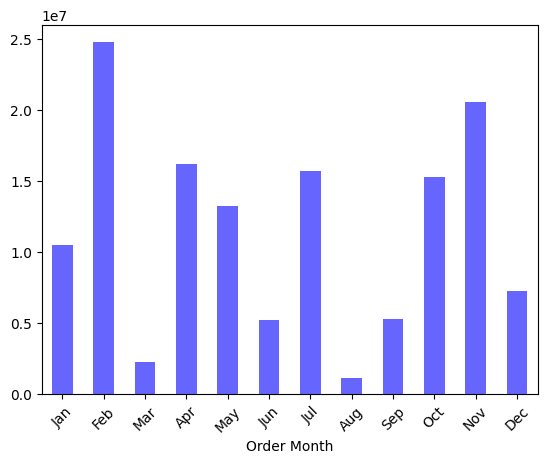

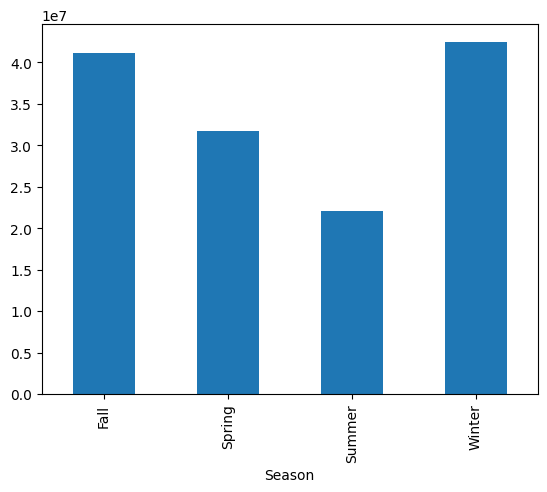

In [19]:
#specific months or seasons with higher sales

sales['Order Month']=sales['Order Date'].dt.month
sales['Season']=sales['Order Month'].map({ 
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
monthly_sales=sales.groupby('Order Month')['Total Revenue'].sum()
seasonal_sales=sales.groupby('Season')['Total Revenue'].sum()
monthly_sales.plot(kind='bar',color='blue',alpha=0.6)
plt.xticks(range(12), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.show()
seasonal_sales.plot(kind='bar')
plt.show()


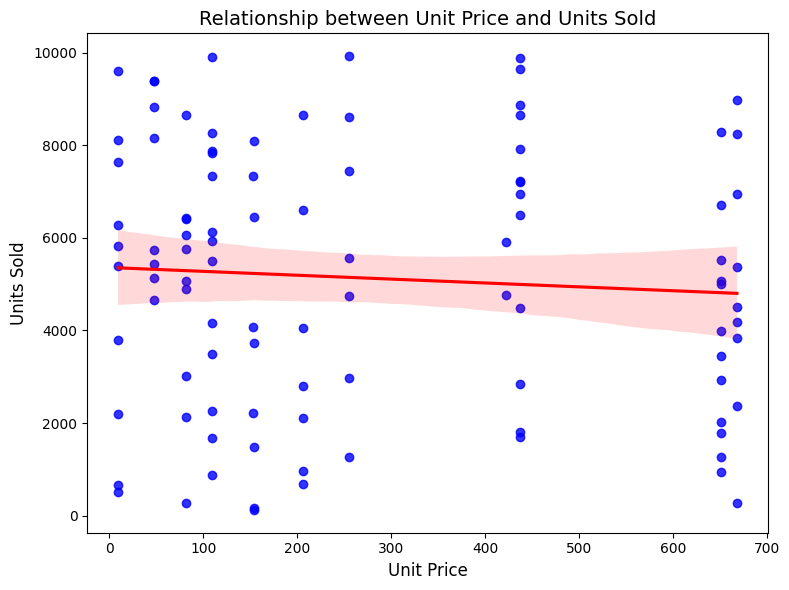

Correlation between Unit Price and Units Sold: -0.07


In [20]:
#Does reducing the Unit Price increase the Units Sold?
plt.figure(figsize=(8, 6))
sns.regplot(data=sales, x='Unit Price', y='Units Sold', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship between Unit Price and Units Sold', fontsize=14)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = sales['Unit Price'].corr(sales['Units Sold'])
print(f"Correlation between Unit Price and Units Sold: {correlation:.2f}")


Index(['Baby Food', 'Beverages', 'Cereal', 'Clothes', 'Cosmetics', 'Fruits',
       'Household', 'Meat', 'Office Supplies', 'Personal Care', 'Snacks',
       'Vegetables'],
      dtype='object', name='Item Type')


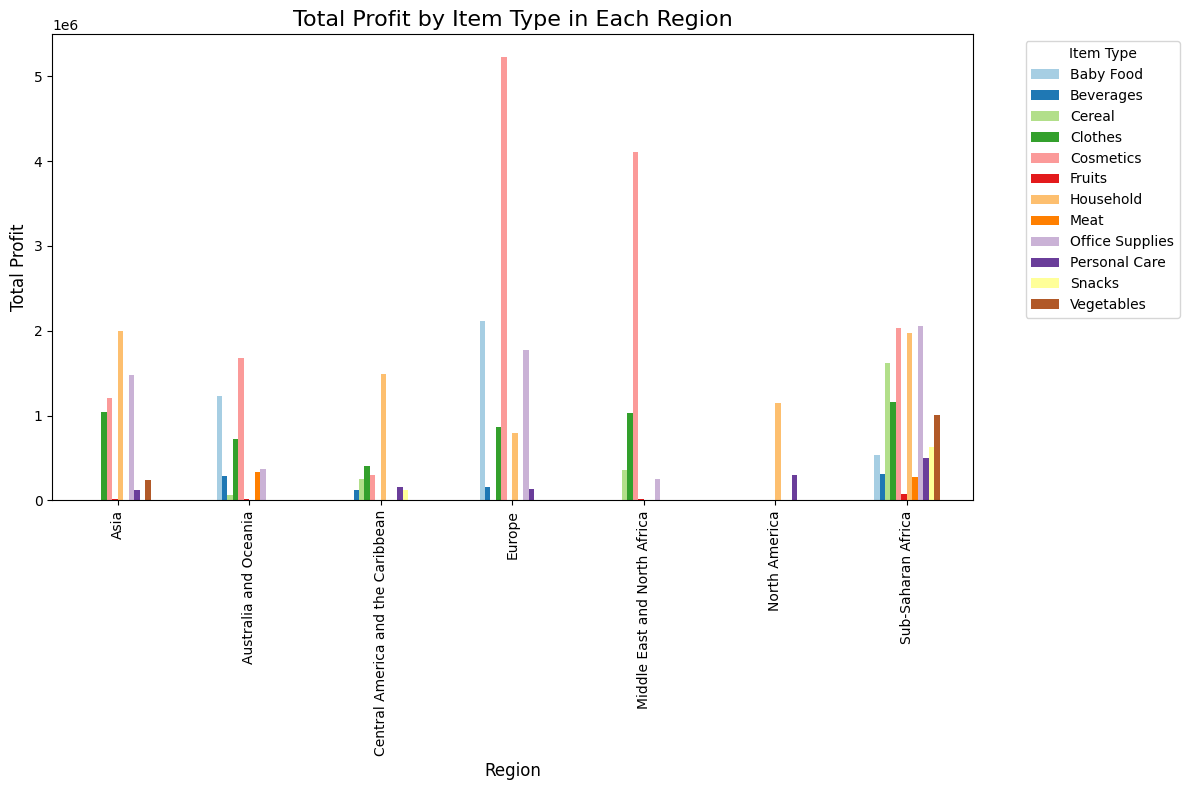

In [30]:
#Which Item Type performs best in each region?
item_region_profit = sales.groupby(['Region', 'Item Type'])['Total Profit'].sum().unstack()
item_region_profit.plot(kind='bar', figsize=(12, 8), color=plt.cm.Paired(np.linspace(0, 1, len(item_region_profit.columns))))
print(item_region_profit.columns)
plt.title('Total Profit by Item Type in Each Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()